In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import torchvision.datasets

/Users/yellowduck/miniconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yellowduck/miniconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yellowduck/miniconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yellowduck/miniconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [58]:
# Fetching dataset
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)
# mnist = sklearn.datasets.fetch_mldata('MNIST original')

Files already downloaded and verified
Files already downloaded and verified


In [59]:
train_features = CIFAR_train.train_data
train_labels = CIFAR_train.train_labels
test_features = CIFAR_test.test_data
test_labels = CIFAR_test.test_labels

6


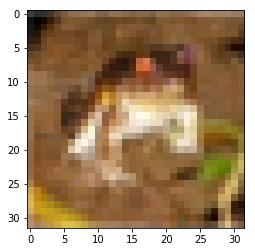

In [60]:
plt.imshow(train_features[0])
print(train_labels[0])

9


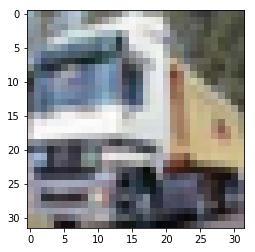

In [61]:
plt.imshow(train_features[1])
print(train_labels[1])

In [62]:
train_features.shape

(50000, 32, 32, 3)

In [63]:
train_features = train_features.swapaxes(2, 3).swapaxes(1, 2)
test_features = test_features.swapaxes(2, 3).swapaxes(1, 2)

In [64]:
train_features.shape

(50000, 3, 32, 32)

In [74]:
# Всего 10 классов
class CifarConvNet(torch.nn.Module):
    def __init__(self):
        super(CifarConvNet, self).__init__()
#         self.batch_norm1 = torch.nn.BatchNorm2d(3)
        self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(2, 2)
#         self.batch_norm2 = torch.nn.BatchNorm2d(16)
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.act2  = torch.nn.ReLU()

        self.pool2 = torch.nn.MaxPool2d(2, 2)
#         self.batch_norm3 = torch.nn.BatchNorm2d(32)
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
        self.act3  = torch.nn.ReLU()
        
#         self.batch_norm4 = torch.nn.BatchNorm1d(64*64)
        self.fc1   = torch.nn.Linear(64 * 64, 256)
        self.act4  = torch.nn.Tanh()
#         self.batch_norm5 = torch.nn.BatchNorm1d(256)
        self.fc2   = torch.nn.Linear(256, 64)
        self.act5  = torch.nn.Tanh()
#         self.batch_norm6 = torch.nn.BatchNorm1d(64)
        self.fc3   = torch.nn.Linear(64, 10)
    
    def forward(self, x):
#         x = self.batch_norm1(x)
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
#         x = self.batch_norm2(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
#         x = self.batch_norm3(x)
        x = self.conv3(x)
        x = self.act3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
#         x = self.batch_norm4(x)
        x = self.fc1(x)
        x = self.act4(x)
#         x = self.batch_norm5(x)
        x = self.fc2(x)
        x = self.act5(x)
#         x = self.batch_norm6(x)
        x = self.fc3(x)
        
        return x

In [75]:
cifar_net = CifarConvNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cifar_net.parameters(), lr=1.0e-3)

In [76]:
train_features = train_features.astype(float)
test_featrues = test_features.astype(float)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [78]:
batch_size = 100
for epoch in range(100):
    order = np.random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = train_features[batch_indice, :, :, :]
        
        batch_features = torch.FloatTensor(batch_features)
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        preds = cifar_net.forward(batch_features)
        loss = criterion(preds, batch_labels)
        
        loss.backward()
        
        optimizer.step()
        
    order = np.random.permutation(test_features.shape[0])
    
    all_preds = []
    all_trues = []
    for start_index in range(0, test_features.shape[0], batch_size):
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = test_features[batch_indice, :, :, :].astype(float)
        batch_features = torch.FloatTensor(batch_features)
        trues = test_labels[batch_indice]
        
        preds = cifar_net.forward(batch_features).data.numpy().argmax(axis=1)
        
        all_preds.append(preds)
        all_trues.append(trues)
        
    all_preds = np.concatenate(all_preds)
    all_trues = np.concatenate(all_trues)
    
    print((all_preds == all_trues).sum() / all_trues.size)

# Задание 1
Добавить (раскомментировать) строки кода, добавляющие BatchNorm в модель. Улучшается ли при этом результат? Почему?

# Задание 2
Увеличить размер пятна (perception area) каждой свертки. Улучшится ли качество?

# Задание 3 
Можно ли увеличить размер пятна каким-либо другим способом (помимо увеличения размера свертки) в промежутках между MaxPooling?